--2023-07-12 16:33:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.5'

grades.csv.5        100%[===================>]     322  --.-KB/s    in 0s      

2023-07-12 16:33:15 (25.6 MB/s) - 'grades.csv.5' saved [322/322]

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.5

/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_13966/884155873.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


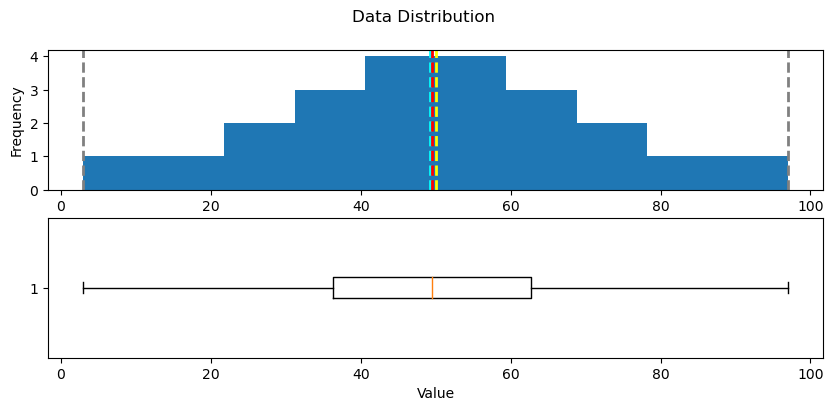

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_13966/884155873.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


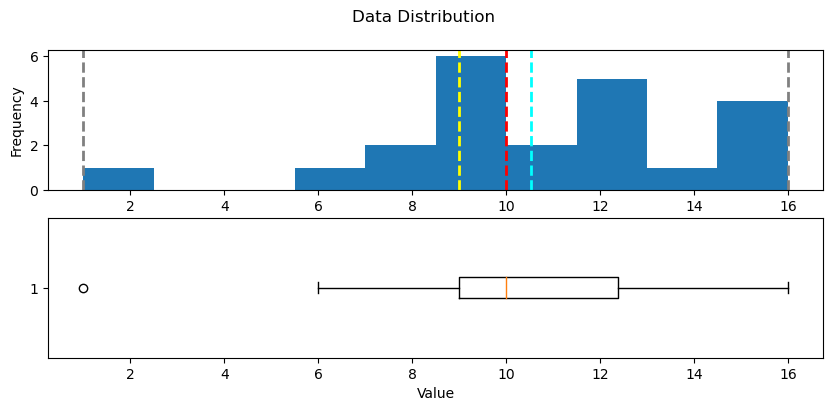

In [2]:
show_distribution(df_students.StudyHours)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_13966/884155873.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


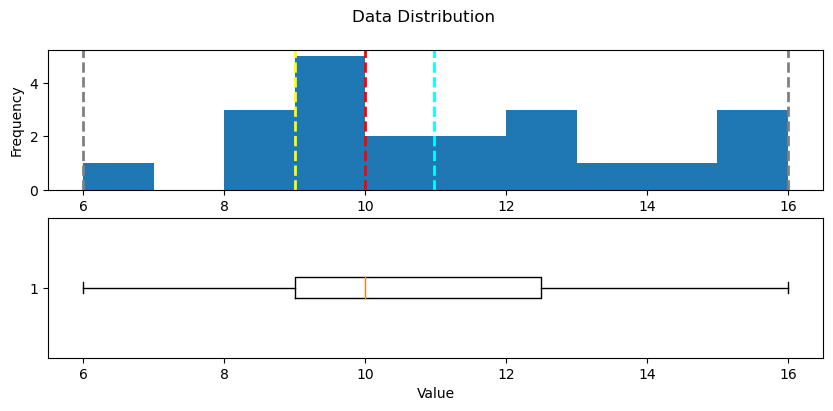

In [3]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

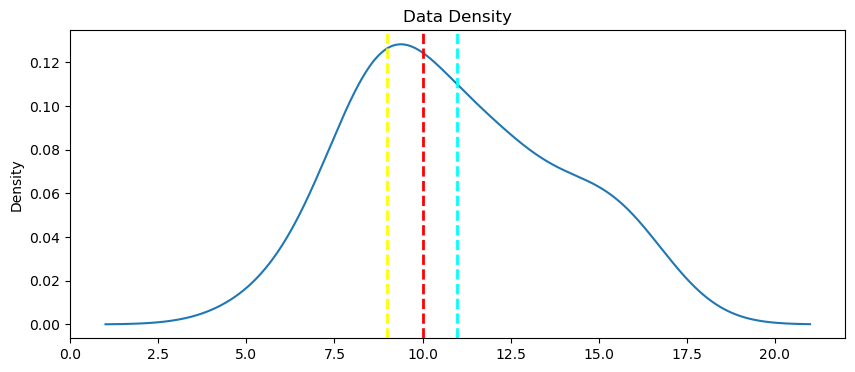

In [4]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

In [7]:
import math

mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours:
    variance = variance + ((mean - hours)**2)

variance = variance/df_students.shape[0]

variance

std = math.sqrt(variance)

std

3.4069690366260925

In [8]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print(f'\n{col_name}:\n - Range: {rng}\n - Variance: {var}\n - Std.Dev: {std}')


Grade:
 - Range: 94.0
 - Variance: 472.53679653679666
 - Std.Dev: 21.73791150356438

StudyHours:
 - Range: 15.0
 - Variance: 12.160173160173159
 - Std.Dev: 3.487143983286775


In [9]:
print(f'68 of grades will fall between {df_students.Grade.mean() - df_students.Grade.std()} and {df_students.Grade.mean() + df_students.Grade.std()}')

68 of grades will fall between 27.4439066782538 and 70.91972968538256


In [11]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [14]:
df_sample = df_students[df_students.StudyHours>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

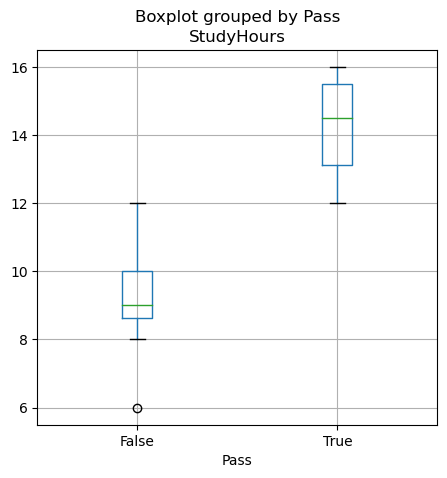

In [16]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(5,5))

<Axes: xlabel='Name'>

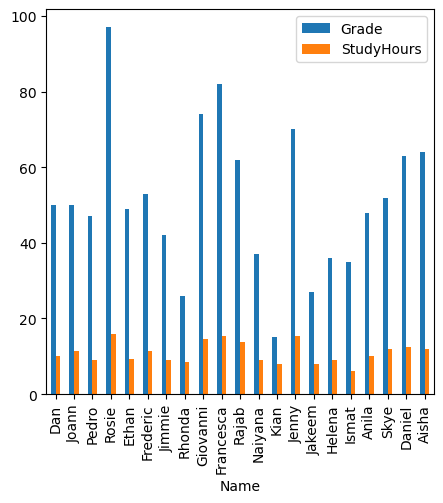

In [17]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(5,5))

<Axes: xlabel='Name'>

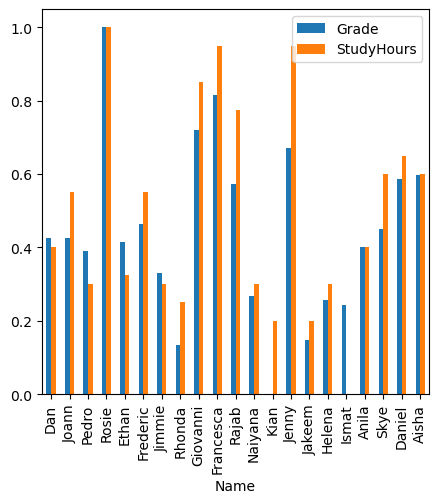

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(5,5))


In [23]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

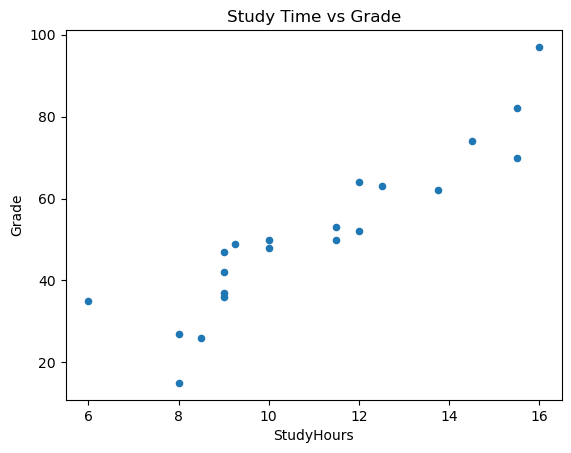

In [24]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

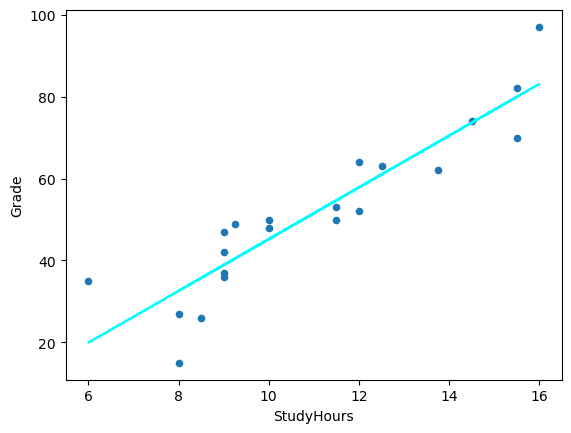

6.31342563379236 -17.91640993281615


In [26]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

df_regression['fx'] = (m * df_regression['StudyHours']) + b
df_regression['error'] = df_regression['fx'] - df_regression['Grade']
df_regression.plot.scatter(x='StudyHours', y='Grade')
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')
plt.show()

print(m,b)

In [27]:
def predict(x):
    m = 6.3134
    b = -17.9164
    return m*x+b

prediction = predict(14)

prediction

70.4712